# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1K-tf97Hjklw_eHFxeup36bBpElSC1hrb

Downloading...
From: https://drive.google.com/uc?id=1K-tf97Hjklw_eHFxeup36bBpElSC1hrb
To: /content/train.csv
100% 664k/664k [00:00<00:00, 75.6MB/s]


In [ ]:
data = pd.read_csv('./train.csv')
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3689,66,91.70,6075.9,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
3350,62,108.15,6825.65,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,0
1170,35,100.25,3527.6,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
2068,70,98.70,6858.9,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),0


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: float(x) if x.replace('.','',1).isdigit() else x)

In [ ]:
for i in data['TotalSpent']:
    if type(i) != float:
        print(repr(i))

' '
' '
' '
' '
' '
' '
' '
' '
' '


In [ ]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: x if type(x) == float else np.NaN)

In [ ]:
data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())

In [ ]:
for column in data.columns:
    missing = np.mean(data[column].isna() * 100)
    print(f'{column}: {round(missing, 1)}%')

ClientPeriod: 0.0%
MonthlySpending: 0.0%
TotalSpent: 0.0%
Sex: 0.0%
IsSeniorCitizen: 0.0%
HasPartner: 0.0%
HasChild: 0.0%
HasPhoneService: 0.0%
HasMultiplePhoneNumbers: 0.0%
HasInternetService: 0.0%
HasOnlineSecurityService: 0.0%
HasOnlineBackup: 0.0%
HasDeviceProtection: 0.0%
HasTechSupportAccess: 0.0%
HasOnlineTV: 0.0%
HasMovieSubscription: 0.0%
HasContractPhone: 0.0%
IsBillingPaperless: 0.0%
PaymentMethod: 0.0%
Churn: 0.0%


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
import seaborn as sns

### Boxplot

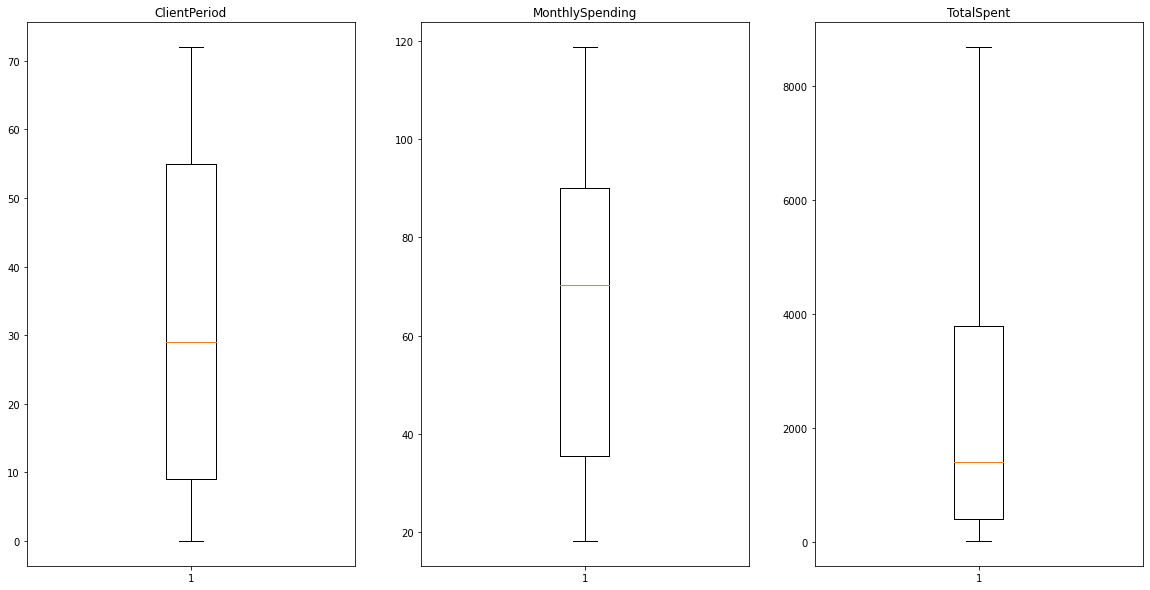

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))
for i, column in enumerate(num_cols):
    ax[i].boxplot(data[column])
    ax[i].set_title(column)

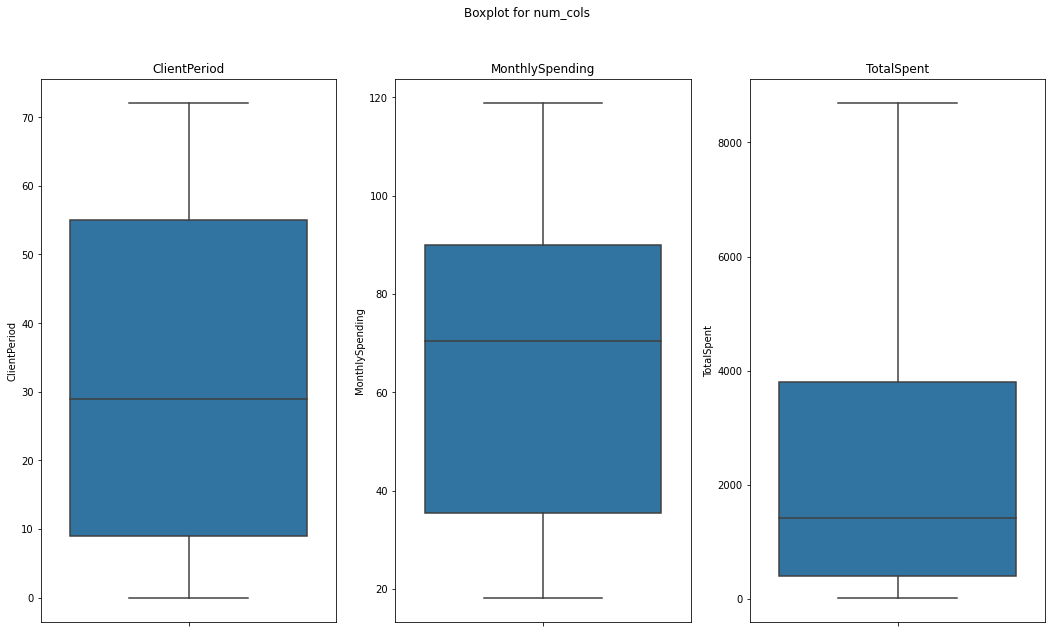

In [ ]:
# YOUR CODE
# data[num_cols].hist(figsize=(16,10), edgecolor='black');

fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Boxplot for num_cols')

for i, column in enumerate(num_cols):
    sns.boxplot(ax=axes[i], y=data[column])
    axes[i].set_title(column)

### Cat_cols: value_counts

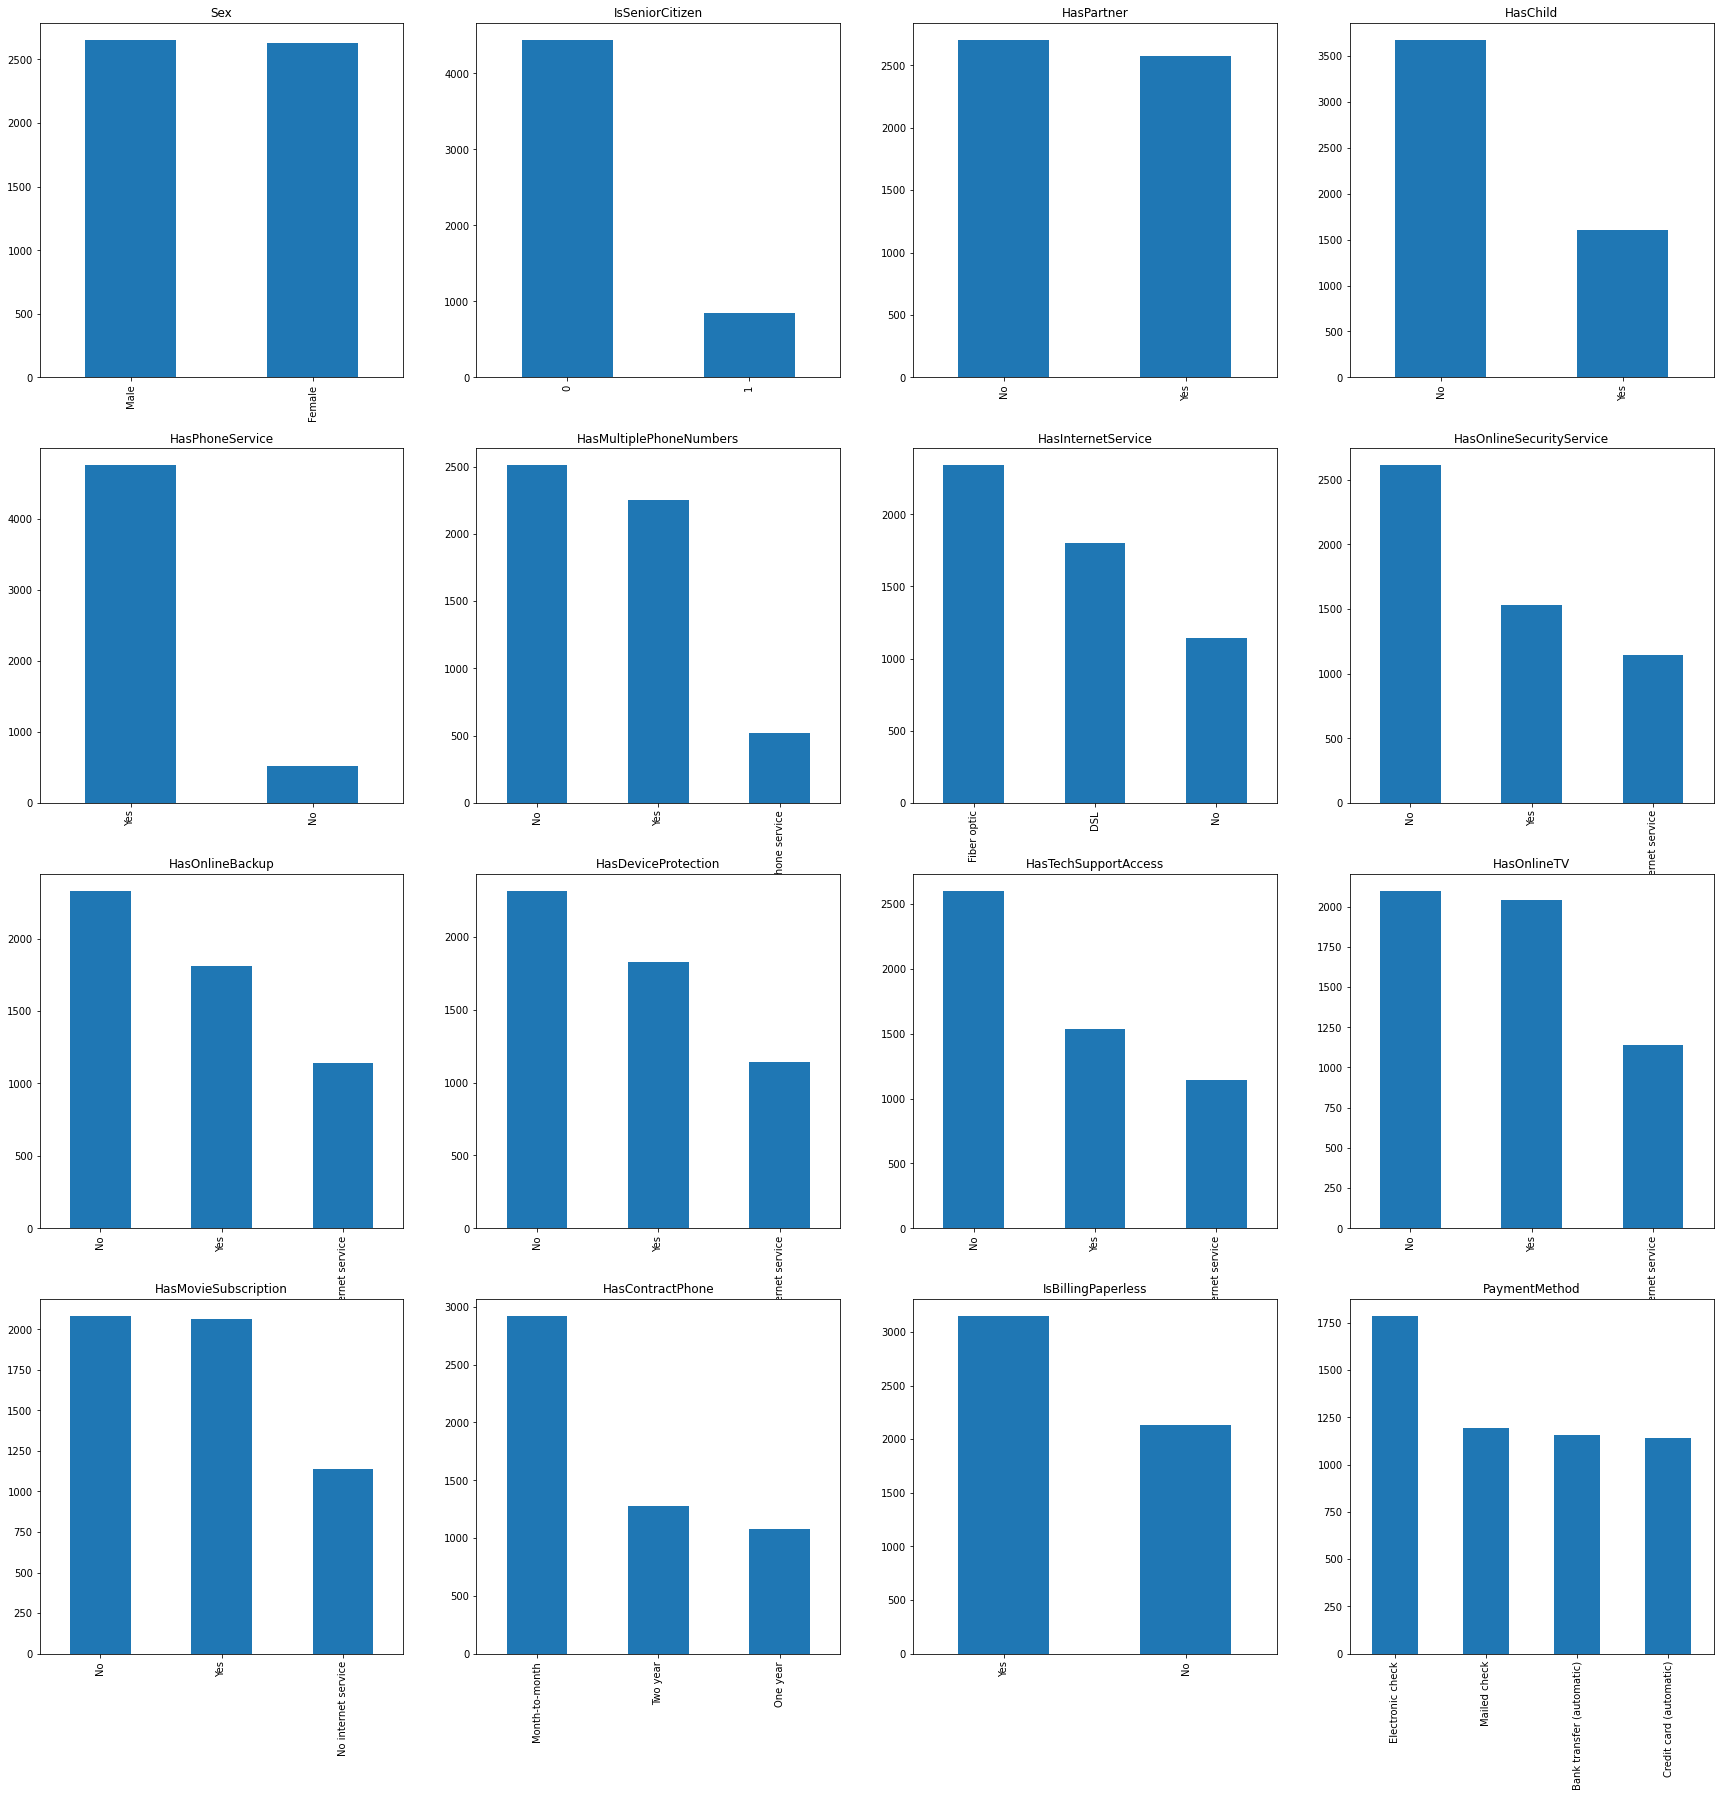

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(30, 30))
for i, column in enumerate(cat_cols):
    data[column].value_counts().plot(kind="bar", ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(column)

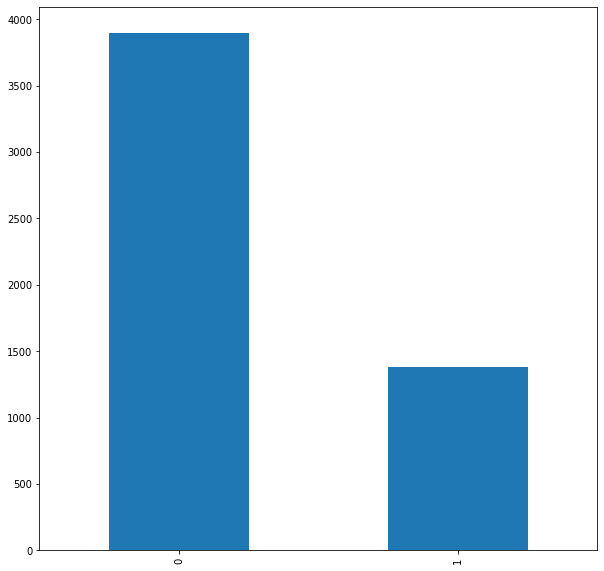

In [ ]:
data[target_col].value_counts().plot(kind='bar', figsize=(10, 10));

### значительно преобладает класс 0

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display="diagram")


In [ ]:
num_transformer = make_pipeline(StandardScaler())

cat_transformer = make_pipeline(OneHotEncoder())

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols),
    ]
)

clf_pipe = make_pipeline(preprocessor, LogisticRegression())

param_grid = {
    "logisticregression__C": [100, 10, 1, 0.1, 0.01, 0.001],
}

search = GridSearchCV(clf_pipe, param_grid=param_grid, scoring='roc_auc', n_jobs=2, refit=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=0)

clf_pipe.fit(X_train, y_train)
print("model score: %.3f" % clf_pipe.score(X_test, y_test))

model score: 0.799


In [ ]:
search.fit(data[feature_cols], data[target_col])

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=2,
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.845):
{'logisticregression__C': 100}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import roc_auc_score

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(data[feature_cols], data[target_col], train_size=0.75, random_state=42)

In [ ]:
#Create datasets
train_dataset = Pool(X_train, y_train, cat_features=cat_cols)
eval_dataset = Pool(X_validation, y_validation, cat_features=cat_cols)

model = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')
  
#Declare parameters to tune and values to try
grid = {'iterations': [2000, 3000],
        'learning_rate': [0.01],
        'depth': [3, 4],
        'l2_leaf_reg': [5, 7]}

#Find optimum parameters
model.grid_search(grid, train_dataset)

In [ ]:
params = {
    'iterations': 3000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 7,
    'loss_function': 'Logloss', 
    'eval_metric': 'AUC',
}

model_2 = CatBoostClassifier(**params)

model_2.fit(train_dataset, 
            eval_set=eval_dataset,
            early_stopping_rounds=200,
            silent=False)

0:	test: 0.7586935	best: 0.7586935 (0)	total: 50.6ms	remaining: 2m 31s
1:	test: 0.7682973	best: 0.7682973 (1)	total: 87ms	remaining: 2m 10s
2:	test: 0.7889218	best: 0.7889218 (2)	total: 113ms	remaining: 1m 52s
3:	test: 0.7938435	best: 0.7938435 (3)	total: 150ms	remaining: 1m 52s
4:	test: 0.7927290	best: 0.7938435 (3)	total: 174ms	remaining: 1m 44s
5:	test: 0.7959282	best: 0.7959282 (5)	total: 193ms	remaining: 1m 36s
6:	test: 0.7950962	best: 0.7959282 (5)	total: 218ms	remaining: 1m 33s
7:	test: 0.7946663	best: 0.7959282 (5)	total: 271ms	remaining: 1m 41s
8:	test: 0.7939448	best: 0.7959282 (5)	total: 294ms	remaining: 1m 37s
9:	test: 0.7934229	best: 0.7959282 (5)	total: 323ms	remaining: 1m 36s
10:	test: 0.7930621	best: 0.7959282 (5)	total: 353ms	remaining: 1m 35s
11:	test: 0.7926568	best: 0.7959282 (5)	total: 378ms	remaining: 1m 34s
12:	test: 0.7923375	best: 0.7959282 (5)	total: 396ms	remaining: 1m 31s
13:	test: 0.7919430	best: 0.7959282 (5)	total: 432ms	remaining: 1m 32s
14:	test: 0.7920

Модель со скором 0.85298:

In [ ]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Accuracy',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 5,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=Mi

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", 1)
print("\n The best score across ALL searched params:\n", model.best_score_)
print("\n The best parameters across ALL searched params:\n", model.best_params_)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
!gdown 1ZDlKZdX0arZLQfqu9qNy7Oh2BvdeE_1Z

Downloading...
From: https://drive.google.com/uc?id=1ZDlKZdX0arZLQfqu9qNy7Oh2BvdeE_1Z
To: /content/test.csv
100% 218k/218k [00:00<00:00, 71.4MB/s]


In [ ]:
!gdown 1FMEFDp-SBt5yxka5WAetGpDd7Ry_3szh

Downloading...
From: https://drive.google.com/uc?id=1FMEFDp-SBt5yxka5WAetGpDd7Ry_3szh
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 15.3MB/s]


In [ ]:
best_model = model_2 # какая-то предыдущая модель

X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: float(x) if x.replace('.','',1).isdigit() else x)
for i in X_test['TotalSpent']:
    if type(i) != float:
        print(repr(i))

' '
' '


In [ ]:
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: x if type(x) == float else np.nan)
X_test['TotalSpent'] = X_test['TotalSpent'].fillna(X_test['TotalSpent'].median())

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1] #/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

In [ ]:
submission['Churn']

0       0.050140
1       0.674794
2       0.687550
3       0.016153
4       0.007637
          ...   
1756    0.108085
1757    0.012287
1758    0.824067
1759    0.579481
1760    0.016943
Name: Churn, Length: 1761, dtype: float64

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

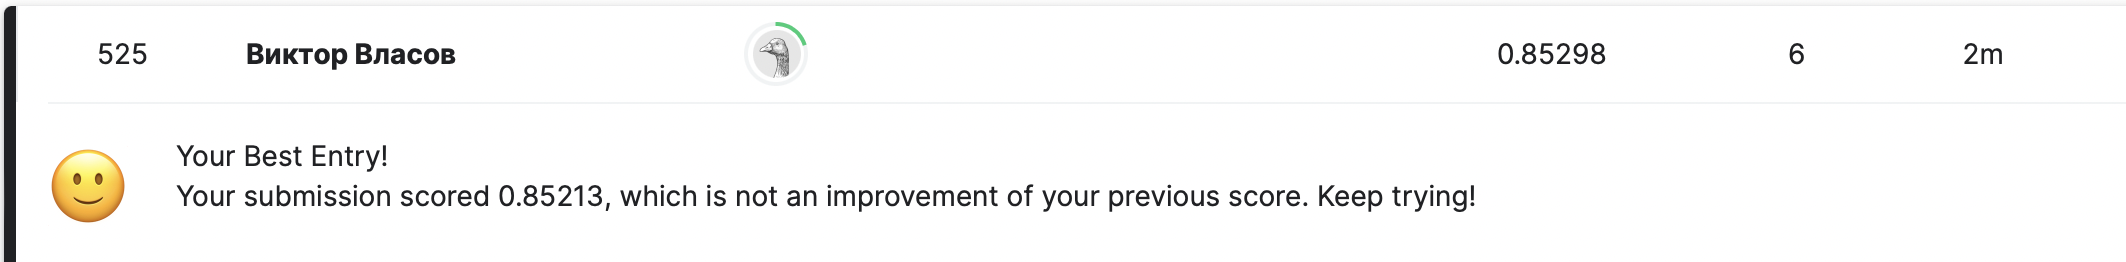